## Import Data <a class="anchor" id="first-bullet"></a>

In [40]:
import pandas as pd
# Read json file created from Scrapy python package (Web Scraping from apartments.com)
df = pd.read_json('/home/jbalda/Desktop/rentIndy-scrape/rentScraper/rentScraper/rentals.json')
# Print first 10 lines
df.head(10)

,name,address,min_price,max_price,link
0,The Whit,"307 N Pennsylvania St, Indianapolis, IN 46204",1423,1880,https://www.apartments.com/the-whit-indianapol...
1,The Residences on 56th Street,"6800 Brendon Way W Dr, Indianapolis, IN 46226",925,925,https://www.apartments.com/the-residences-on-5...
2,The Meridian South,"2085 Waterford Pl, Indianapolis, IN 46260",835,1005,https://www.apartments.com/the-meridian-south-...
3,Pinnacle on Meridian,"8555 One West Dr, Indianapolis, IN 46260",2600,2600,https://www.apartments.com/pinnacle-on-meridia...
4,Cosmopolitan on the Canal,"310 W Michigan St, Indianapolis, IN 46202",1428,1826,https://www.apartments.com/cosmopolitan-on-the...
5,747 Apartments,"747 N College Ave, Indianapolis, IN 46202",1580,1831,https://www.apartments.com/747-apartments-indi...
6,Edison at Meridian Hills,"811 Antique Ct, Indianapolis, IN 46260",1029,1229,https://www.apartments.com/edison-at-meridian-...
7,Circa Apartments,"617 N College Ave, Indianapolis, IN 46204",1342,2342,https://www.apartments.com/circa-apartments-in...
8,Encore 55+ Boutique Apartments,"6675 E 75th St, Indianapolis, IN 46250",1395,1395,https://www.apartments.com/encore-55-boutique-...
9,Canal Square,"359 N West St, Indianapolis, IN 46202",1034,1649,https://www.apartments.com/canal-square-indian...


## Add Apartment Coordinates Using Address (Geocode) <a class="anchor" id="second-bullet"></a>

In [ ]:
# Install packages for conversion
!pip install geopy

In [63]:
# Import geocoder
import geopy
from geopy.geocoders import Nominatim

In [69]:
# Create lists to hold coordinate values
latitude_values = []
longitude_values = []

# For loop that iterates between addresses in dataframe 
for address in df['address']:
    # Nominatim is the geocoder
    locator = Nominatim(user_agent='myGeocode').geocode(address)
    try:
        latitude_values.append(locator.latitude)
        longitude_values.append(locator.longitude)
    # If address cannot be located, lat and long is set to None
    except:
        latitude_values.append(None)
        longitude_values.append(None)

# Add latitude and longitude values to dataframe as new columns 
df['latitude'] = latitude_values
df['longitude'] = longitude_values

In [72]:
# Print first 10 rows of updated dataframe. Note the new latitude and longitude columns
df.head(10)

,name,address,min_price,max_price,link,latitude,longitude
0,The Whit,"307 N Pennsylvania St, Indianapolis, IN 46204",1423,1880,https://www.apartments.com/the-whit-indianapol...,39.771689,-86.155606
1,The Residences on 56th Street,"6800 Brendon Way W Dr, Indianapolis, IN 46226",925,925,https://www.apartments.com/the-residences-on-5...,39.857498,-86.052062
2,The Meridian South,"2085 Waterford Pl, Indianapolis, IN 46260",835,1005,https://www.apartments.com/the-meridian-south-...,39.885046,-86.197907
3,Pinnacle on Meridian,"8555 One West Dr, Indianapolis, IN 46260",2600,2600,https://www.apartments.com/pinnacle-on-meridia...,39.911645,-86.158829
4,Cosmopolitan on the Canal,"310 W Michigan St, Indianapolis, IN 46202",1428,1826,https://www.apartments.com/cosmopolitan-on-the...,39.774308,-86.166611
5,747 Apartments,"747 N College Ave, Indianapolis, IN 46202",1580,1831,https://www.apartments.com/747-apartments-indi...,39.777218,-86.145154
6,Edison at Meridian Hills,"811 Antique Ct, Indianapolis, IN 46260",1029,1229,https://www.apartments.com/edison-at-meridian-...,39.873464,-86.173578
7,Circa Apartments,"617 N College Ave, Indianapolis, IN 46204",1342,2342,https://www.apartments.com/circa-apartments-in...,39.775415,-86.145225
8,Encore 55+ Boutique Apartments,"6675 E 75th St, Indianapolis, IN 46250",1395,1395,https://www.apartments.com/encore-55-boutique-...,39.890606,-86.053987
9,Canal Square,"359 N West St, Indianapolis, IN 46202",1034,1649,https://www.apartments.com/canal-square-indian...,39.767950,-86.166954


## Visualize Apartment Locations <a class="anchor" id="third-bullet"></a>

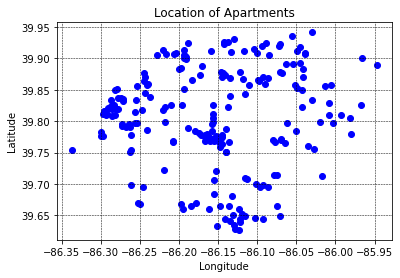

In [85]:
from matplotlib import pyplot as plt
# Graph scatter plot from dataframe with each apartment in blue
plt.scatter(x="longitude", y="latitude", data=df, c='blue')
plt.title("Location of Apartments")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.show()

## Cluster Analysis <a class="anchor" id="fourth-bullet"></a>

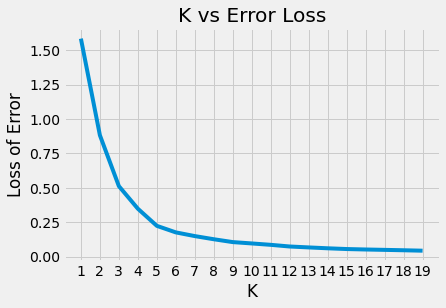

In [107]:
import numpy as np
from sklearn.cluster import KMeans

latitude_not_none = [x for x in latitude_values if x is not None]
longitude_not_none = [x for x in longitude_values if x is not None]

d = {'latitude': latitude_not_none, 'longitude': longitude_not_none}

data = pd.DataFrame(data=d)

coordinates = data[["latitude","longitude"]].to_numpy()

lossOfError =[] 
for i in range(1, 20): 
    kmeans = KMeans(n_clusters = i, max_iter = 500) 
    kmeans.fit(coordinates) 
    lossOfError.append(kmeans.inertia_) 
    
plt.plot(range(1,20), lossOfError)
plt.xticks(np.arange(1,20, step=1))
plt.title("K vs Error Loss")essentially 
plt.xlabel("K") 
plt.ylabel("Loss of Error")
plt.show()

### Notice it begins to smoothen out after 6 clusters, therefore I will choose 6 clusters in the next step

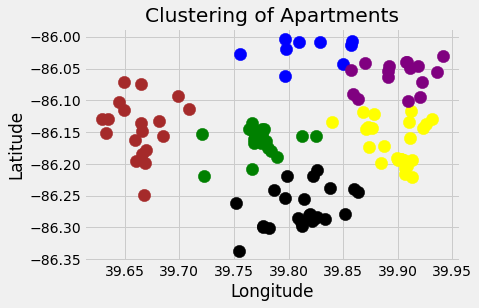

In [114]:
kmeans = KMeans(n_clusters = 6, max_iter = 1000)
kmeans.fit(coordinates)

y_kmeans = kmeans.fit_predict(coordinates)

# Plot cluster
plt.scatter(coordinates[y_kmeans ==0,0], coordinates[y_kmeans == 0,1], s=150, c='yellow')
plt.scatter(coordinates[y_kmeans ==1,0], coordinates[y_kmeans == 1,1], s=150, c='blue')
plt.scatter(coordinates[y_kmeans ==2,0], coordinates[y_kmeans == 2,1], s=150, c='green')
plt.scatter(coordinates[y_kmeans ==3,0], coordinates[y_kmeans == 3,1], s=150, c='black')
plt.scatter(coordinates[y_kmeans ==4,0], coordinates[y_kmeans == 4,1], s=150, c='brown')
plt.scatter(coordinates[y_kmeans ==5,0], coordinates[y_kmeans == 5,1], s=150, c='purple')

plt.title("Clustering of Apartments")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()

As you can see we have six clusters, all describing areas of Indianapolis with highly dense populations (I am making this assumption based on initial images from apartments.com and my knowledge of the Indianapolis area). Although I was not able to scrape all the data from apartments.com, it appears to be enough to get a good idea of Indianapolis in terms of apartment locations. 